In [32]:
import numpy as np
from scipy.special import genlaguerre
from scipy.integrate import quad
import matplotlib.pyplot as plt
import math

NOTE : For detailed derivations of expressions, refer the analytical script of Stark Effect

In [33]:
def hydrogen_radial(n, l, r):
    
    prefactor = np.sqrt((2.0 / n)**3 * math.factorial(n - l - 1) / 
                        (2.0 * n * math.factorial(n + l))) # Normalisation factor
    laguerre_poly = genlaguerre(n - l - 1, 2 * l + 1)
    
    rho = 2.0 * r / n # Dimensionless radial coordinate
    
    return prefactor * np.exp(-r / n) * (rho ** l) * laguerre_poly(rho)

$$
N_{nl} = \left(\frac{n a_0^2}{2}\right)^{\frac{3}{2}} \, \frac{2n\,(n+l)!}{(n-l-1)!}
\
and 
\
R_{nl}(r)
= N_{nl}\, e^{-\rho/2}\, \rho^{l}\, L_{n-l-1}^{2l+1}(\rho)

$$


In [34]:
#We split this into Radial and Angular parts:
# Integral = (Radial Integral) * (Angular Factor)
def calc_matrix_element(n_prime):
    angular_factor = 1.0 / np.sqrt(3.0)

    def integrand(r):
        return hydrogen_radial(n_prime, 1, r) * r * hydrogen_radial(1, 0, r) * (r**2)
    radial_val, error = quad(integrand, 0, np.inf)
    
    return radial_val * angular_factor
    

$$
I_\Omega = \int Y_{10}^*(\Omega) \cos\theta\, Y_{00}(\Omega)\, d\Omega = \frac{1}{\sqrt{3}}
$$


$$
I_R = \int_0^\infty R_{n'1}(r)\, r^3\, R_{10}(r)\, dr
$$

In [35]:
def second_order_shift(n_max):
    
    E_ground = -0.5 / (1**2) # n = 1
    
    energy_correction = 0
    
    for n_prime in range(2, n_max + 1):
        
        E_excited = -0.5 / (n_prime**2)
        
        delta_E = E_ground - E_excited
        
        z_matrix_element = calc_matrix_element(n_prime)
        
        term = (np.abs(z_matrix_element)**2) / delta_E
        
        energy_correction += term
        
    return energy_correction

$$
E_n^{(0)} = -\frac{1}{2n^2}\ \text{Ha} 
\ and\ 
E^{(2)} = \sum_{n'=2}^{n_{\text{max}}} \frac{|\langle n'10 | z | 100 \rangle|^2}{E_1^{(0)} - E_{n'}^{(0)}}

$$


In [36]:
max = 50

computed_coeff = second_order_shift(max)
theoretical_coeff = -2.25 # Theoretical shift is -9/4 * field^2

error_percent = np.abs((computed_coeff - theoretical_coeff) / theoretical_coeff) * 100

print(f"Computed Coefficient:   {computed_coeff:.5f}")
print(f"Theoretical Coefficient:      {theoretical_coeff:.5f}")
print(f"Error:            {error_percent:.2f}%")

# The error arises due to the continuum states E>0, which we dont include in our discret calculations


Computed Coefficient:   -1.83102
Theoretical Coefficient:      -2.25000
Error:            18.62%


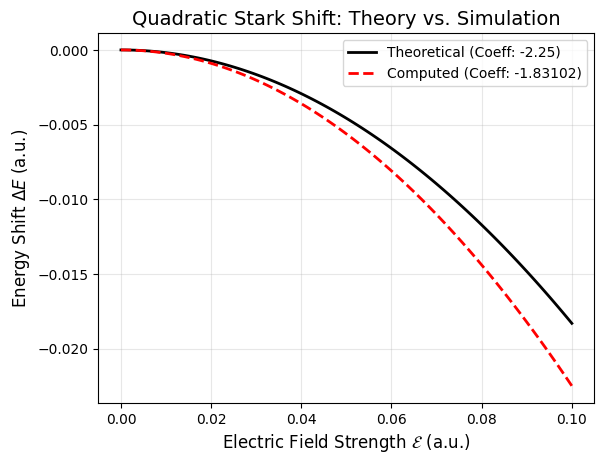

In [37]:
E_field_quad = np.linspace(0, 0.1, 100)

delta_E_theory = computed_coeff * (E_field_quad**2)
delta_E_computed = theoretical_coeff * (E_field_quad**2)

plt.plot(E_field_quad, delta_E_theory, 'k-', linewidth=2, label=f'Theoretical (Coeff: {coeff_theory})')

plt.plot(E_field_quad, delta_E_computed, 'r--', linewidth=2, label=f'Computed (Coeff: {coeff_computed})')

plt.title(r'Quadratic Stark Shift: Theory vs. Simulation', fontsize=14)
plt.xlabel(r'Electric Field Strength $\mathcal{E}$ (a.u.)', fontsize=12)
plt.ylabel(r'Energy Shift $\Delta E$ (a.u.)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()